In [151]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [170]:
df= pd.read_csv("movies_data_2.0.csv")
no_skobochka = str.maketrans("", "", "[]' ")
df["Жанры"] = df["Жанры"].apply(lambda x: x.translate(no_skobochka).split(','))
df["Дата премьеры в мире"] = df["Дата премьеры в мире"].apply(lambda x: x.replace('T00:00:00.000Z',''))
#уберем ненужные столбцы, переведем в датный формат даты
del df["Дата премьеры в России"]
del df["Голоса кинокритиков"]
del df["Голоса российских кинокритиков"]
df.loc[:,"Дата премьеры в мире"]=pd.to_datetime(df["Дата премьеры в мире"])
df

,Название,Год выпуска,Длительность,Жанры,Рейтинг КиноПоиск,Рейтинг IMDB,Рейтинг кинокритиков,Рейтинг российских кинокритиков,Голоса КиноПоиск,Голоса IMDB,Бюджет,Дата премьеры в мире,Мировые кассовые сборы
0,1+1,2011,112.0,"[драма, комедия]",8.846,8.5,6.8,100.0000,2431363,966636,10355000,2011-09-23 00:00:00,426588510
1,Джентльмены,2019,113.0,"[криминал, комедия, боевик]",8.626,7.8,6.6,86.3636,2145499,427468,22000000,2019-12-03 00:00:00,115171795
2,Брат,1997,96.0,"[драма, криминал, боевик]",8.338,7.8,7.6,0.0000,1572786,26162,44955845,1997-05-17 00:00:00,1362281
3,Гнев человеческий,2021,119.0,"[боевик, триллер]",7.668,7.1,6.3,72.2222,1548405,221419,40000000,2021-04-22 00:00:00,103966489
4,Волк с Уолл-стрит,2013,180.0,"[драма, криминал, биография, комедия]",8.033,8.2,7.8,77.4194,1460341,1660210,100000000,2013-12-09 00:00:00,392000694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4869,Овечка Долли была злая и рано умерла,2015,109.0,"[фантастика, комедия, приключения]",6.715,5.8,0.0,0.0000,26802,334,960000,2015-11-05 00:00:00,112164013
4870,Орел и решка,1995,82.0,"[комедия, мелодрама]",7.875,7.0,0.0,0.0000,26799,577,44955845,1995-11-03 00:00:00,112164013
4871,Ничего себе поездочка,2001,97.0,"[боевик, триллер, детектив]",6.927,6.6,6.6,0.0000,26789,78541,23000000,2001-09-09 00:00:00,36642838
4872,Американский огурчик,2020,88.0,"[комедия, фантастика, драма]",5.991,5.7,6.1,100.0000,26781,27737,44955845,2020-07-26 00:00:00,499649


Посмотрим на данные

In [ ]:
#функции для определения мин среднего бюджета во временном промежутке
def min_budget(year1,year2):
    df_year=df[df["Дата премьеры в мире"].apply(lambda x:x.year <= year2 and x.year >=year1)]
    return int(df_year["Бюджет"].min())
def mean_budget(year1,year2):
    df_year=df[df["Дата премьеры в мире"].apply(lambda x:x.year <= year2 and x.year >=year1)]
    return int(df_year["Бюджет"].mean())


In [ ]:
#создадим новый фрейм, который покажет нам, сколько фильмов выпускалось в разные годы
max_year=df["Дата премьеры в мире"].max().year
min_year=df["Дата премьеры в мире"].min().year
df_number_of_films= pd.DataFrame(columns=['год', 'количество выпущенных фильмов'])

list_of_years = np.arange(min_year, max_year+1)

for i in list_of_years:
     df_number_of_films.loc[len(df_number_of_films)] = [i, int(df["Дата премьеры в мире"].apply(lambda x:x.year == i).sum())]

df_number_of_films.head(5)

,год,количество выпущенных фильмов
0,1921,1
1,1922,0
2,1923,0
3,1924,0
4,1925,0
...,...,...
100,2021,213
101,2022,236
102,2023,240
103,2024,176


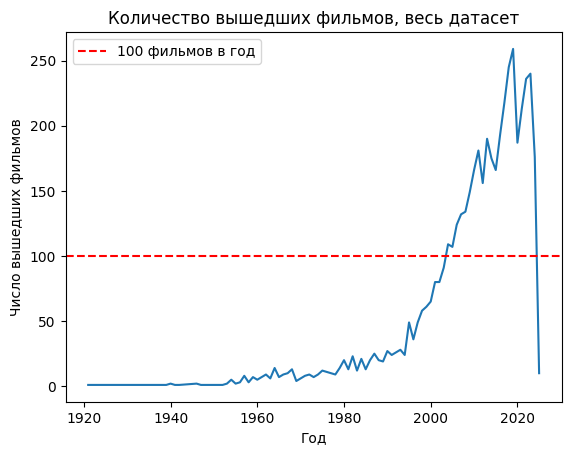

In [ ]:
#визуализируем данные, чтобы убрать года с маленьким кол-вом фильмов
plt.plot(df_number_of_films["год"], df_number_of_films["количество выпущенных фильмов"])
plt.axhline(y=100, color="r", linestyle="dashed", label="100 фильмов в год")
plt.ylabel('Число вышедших фильмов')
plt.xlabel('Год')
plt.title('Количество вышедших фильмов, весь датасет')
plt.gca().legend()
plt.show()

Видно, что в нашей выборке много годов с маленьким количеством вышедших фильмов. Для детального анализа оставим только те года, в которые выпускалось больше 100 фильмов.

In [ ]:
#создаем фрейм с годами, в которых больше 100 фильмов
df_100=df_number_of_films.loc[df_number_of_films["количество выпущенных фильмов"]>=100]

,год,количество выпущенных фильмов
83,2004,109
84,2005,107
85,2006,124
86,2007,132
87,2008,134
88,2009,149
89,2010,166
90,2011,181
91,2012,156
92,2013,190


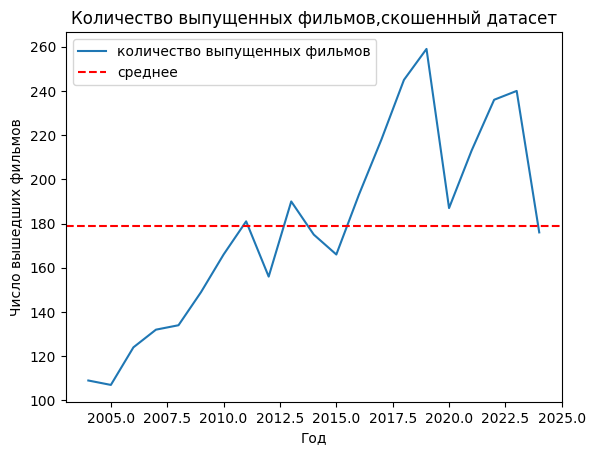

In [ ]:
#посмотрим на среднее по этим годам
df_100.plot(x="год",y="количество выпущенных фильмов")
plt.axhline(y=df_100["количество выпущенных фильмов"].mean(), color="r", linestyle="dashed", label="среднее")
plt.ylabel('Число вышедших фильмов')
plt.xlabel('Год')
plt.gca().legend()
plt.title('Количество выпущенных фильмов,скошенный датасет')
plt.show()

Посмотрим, как в этих годах менялся средний бюджет

/tmp/ipykernel_28640/2807115254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_100["Средний бюджет"]=0
/tmp/ipykernel_28640/2807115254.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '47714558.07339449' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_100.loc[df_100["год"]==i,"Средний бюджет"]=df[df["Дата премьеры в мире"].apply(lambda x:x.year == i)]["Бюджет"].mean()


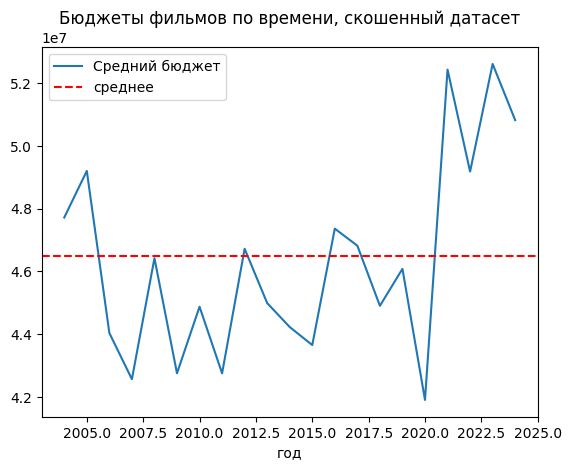

In [ ]:
df_100["Средний бюджет"]=0
for i in df_100["год"]:
    df_100.loc[df_100["год"]==i,"Средний бюджет"]=df[df["Дата премьеры в мире"].apply(lambda x:x.year == i)]["Бюджет"].mean()
df_100.plot(x="год",y="Средний бюджет")
plt.axhline(y=mean_budget(2004,2024), color="r", linestyle="dashed", label="среднее")
plt.gca().legend()
plt.title('Бюджеты фильмов по времени, скошенный датасет')
plt.show()

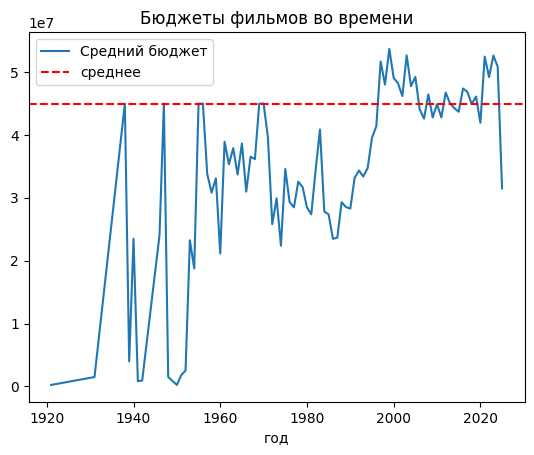

In [ ]:
#посмотрим, можно ли закрыть глаза на инфляцию для нашего промежутка (спойлер, что скорее да, чем нет)
df_number_of_films["Средний бюджет"]=0
for i in df_number_of_films["год"]:
    df_number_of_films.loc[df_number_of_films["год"]==i,"Средний бюджет"]=df[df["Дата премьеры в мире"].apply(lambda x:x.year == i)]["Бюджет"].mean()
#df_number_of_films.plot(x="год",y="Средний бюджет")
df_number_of_films  = df_number_of_films[df_number_of_films["Средний бюджет"].notna()]
df_number_of_films.plot(x="год",y="Средний бюджет")
plt.axhline(y=mean_budget(1920,2025), color="r", linestyle="dashed", label="среднее")
plt.gca().legend()
plt.title('Бюджеты фильмов во времени, весь датасет')
plt.show()

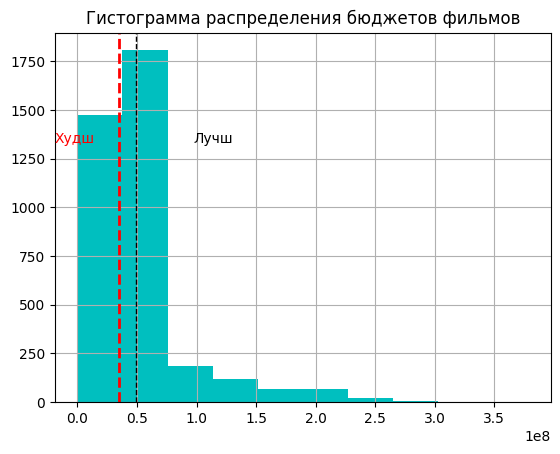

In [ ]:
# чекнем, как распределяется бюджет по этим годам, сравним со средним бюджетом для топ фильмов и для не очень фильмов
best_mean=df.loc[df["Рейтинг IMDB"].apply(lambda x: x >=9)]["Бюджет"].mean()
worst_mean=df.loc[df["Рейтинг IMDB"].apply(lambda x: x <=4)]["Бюджет"].mean()


df_2004_2024= df.loc[df["Дата премьеры в мире"].apply(lambda x:x.year <= 2024 and x.year >=2004)]
df_2004_2024["Бюджет"].hist(color='c')
plt.axvline(worst_mean, color='red', linestyle='dashed', linewidth=2)
plt.axvline(best_mean, color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
min_xlim, max_xlim = plt.xlim()
plt.text(min_xlim, max_ylim*0.7,'Худш',color='red')
plt.text(best_mean*2, max_ylim*0.7,'Лучш',color='k')
plt.title('Гистограмма распределения бюджетов фильмов')
plt.show()


Что видим на картинке? Фильмы, которые высоко оцениваются критиками, имеют больший бюджет.

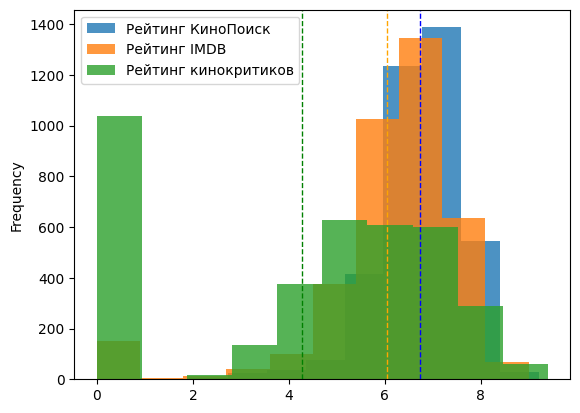

In [ ]:
# чекнем, как эти фильмы оцениваются разными источниками
kritika=['Рейтинг КиноПоиск','Рейтинг IMDB','Рейтинг кинокритиков']
for i in kritika:
  df_2004_2024[i].plot.hist(label=i,alpha=0.8)
plt.gca().legend()
plt.axvline(df_2004_2024['Рейтинг КиноПоиск'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(df_2004_2024['Рейтинг IMDB'].mean(), color='orange', linestyle='dashed', linewidth=1)
plt.axvline(df_2004_2024['Рейтинг кинокритиков'].mean(), color='green', linestyle='dashed', linewidth=1)

plt.show()

Какой делаем вывод? На кинопоиске либо сидят очень добрые люди, либо люди, которые не разбираются в кино. Кинокритики, как и ожидалось, разносят киношки 

In [180]:
#создаем список с жанрами
b=[]
g=[]
genres=[]
for i in df_kino["Жанры"]:
    b.extend(i)
for i in np.unique(b): 
    g.append(str(i).strip())
for i in np.unique(g):
    genres.append(str(i))
#создаем датафрейм
dict = {'жанры':genres
        }
df_genres= pd.DataFrame(dict)
df_genres['Рейтинг КиноПоиск']=0
df_genres['Рейтинг IMDB']=0
df_genres['Рейтинг кинокритиков']=0
df_genres

,жанры,Рейтинг КиноПоиск,Рейтинг IMDB,Рейтинг кинокритиков
0,биография,0,0,0
1,боевик,0,0,0
2,вестерн,0,0,0
3,военный,0,0,0
4,детектив,0,0,0
5,детский,0,0,0
6,документальный,0,0,0
7,драма,0,0,0
8,история,0,0,0
9,комедия,0,0,0


In [191]:
df_kino=df_2004_2024.loc[df["Рейтинг КиноПоиск"].apply(lambda x: x>=8)]
for i in df_kino["Жанры"]:
    if 'драма' in i:
        df_genres.loc[df_genres["жанры"]=='драма']["Рейтинг КиноПоиск"]+=1
df_genres
            



/tmp/ipykernel_28640/360367041.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_genres.loc[df_genres["жанры"]=='драма']["Рейтинг КиноПоиск"]+=1
/tmp/ipykernel_28640/360367041.py:4: SettingWithCopyWarning: 
A value is trying to be set o

,жанры,Рейтинг КиноПоиск,Рейтинг IMDB,Рейтинг кинокритиков
0,биография,0,0,0
1,боевик,0,0,0
2,вестерн,0,0,0
3,военный,0,0,0
4,детектив,0,0,0
5,детский,0,0,0
6,документальный,0,0,0
7,драма,0,0,0
8,история,0,0,0
9,комедия,0,0,0
